In [ ]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras import layers, Input, models

from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical

from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization

In [ ]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/LSWMD.pkl')

In [ ]:
# 차원 검사용 변수 waferMapDIM 생성
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim
105396,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4188.0,lot7187,22.0,[],[],"(76, 71)"
349603,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9796.0,lot20873,13.0,[],[],"(122, 102)"
150190,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3532.0,lot9647,7.0,[],[],"(64, 71)"
596371,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot37371,20.0,[],[],"(49, 39)"
691062,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot42662,22.0,[[Test]],[[none]],"(39, 37)"
763391,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109.0,lot45585,22.0,[[Test]],[[Loc]],"(39, 37)"
188153,"[[0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0,...",548.0,lot11982,25.0,[],[],"(40, 18)"
648775,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",811.0,lot40702,12.0,[[Test]],[[none]],"(34, 31)"
597130,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot37437,5.0,[],[],"(49, 39)"
675035,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2217.0,lot42010,15.0,[[Training]],[[none]],"(52, 55)"


In [ ]:
#Label -> Num 치환
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
54834,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot4432,15.0,[],[],"(32, 29)",[],[]
64209,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",776.0,lot4940,19.0,[],[],"(30, 34)",[],[]
739372,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1507.0,lot44617,1.0,[[Test]],[[none]],"(43, 44)",8,1
635250,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,...",710.0,lot39997,18.0,[],[],"(32, 29)",[],[]
438416,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1080.0,lot26492,15.0,[],[],"(35, 40)",[],[]
550153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot34511,3.0,[],[],"(49, 39)",[],[]
187804,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3036.0,lot11965,21.0,[[Training]],[[Edge-Ring]],"(63, 62)",3,0
96616,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",1028.0,lot6779,4.0,[],[],"(37, 36)",[],[]
539731,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",686.0,lot33691,24.0,[],[],"(31, 28)",[],[]
438271,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1080.0,lot26486,18.0,[],[],"(35, 40)",[],[]


In [ ]:
#패턴라벨 있는 데이터
data_with_label = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
data_with_label = data_with_label.reset_index()

#None 아닌 패턴 데이터
data_with_pattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
data_with_pattern = data_with_pattern.reset_index()

#None 패턴 데이터
data_non_pattern = df[(df['failureNum']==8)]

#패턴라벨 있는 데이터, 패턴라벨 있는 데이터, None 패턴 데이터
data_with_label.shape[0], data_with_pattern.shape[0], data_non_pattern.shape[0]

(172950, 25519, 147431)

In [ ]:
#전처리
def preProcess(failureNum):
  data_with_label = df[(df['failureNum']==failureNum) & (df['waferMapDim'] == (26, 26))]
  data_with_label = data_with_label.reset_index()

  sw = np.ones((1, 26, 26))
  label = list()

  for i in range(len(data_with_label)):
      # skip null label
      if len(data_with_label.iloc[i,:]['failureType']) == 0:
          continue
      sw = np.concatenate((sw, data_with_label.iloc[i,:]['waferMap'].reshape(1, 26, 26)))
      label.append(failureNum)

  x = sw[1:]
  x = x.reshape((x.shape[0], x.shape[1], x.shape[2], 1))
  y = np.array(label).reshape((-1,1))

  return x, y

In [ ]:
#증량
def imageGen(x, failureNum):

  gen_x = np.zeros((1, 26, 26, 1))

  X_data = x

  datagen = ImageDataGenerator(
    rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
    rotation_range=50, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
    zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
    horizontal_flip=True, # 좌우로 뒤집기                                   
    vertical_flip=True,
    fill_mode='nearest',
  )

  datagen.fit(X_data)

  label = list()
  for i in range(0, 10000):
    flow=datagen.flow(_x,_y,batch_size=1, shuffle=True) 
    x, y = flow.next()
    gen_x = np.concatenate((gen_x, x), axis=0)
    label.append(failureNum)

  gen_x = gen_x[1:]
  gen_y = np.array(label).reshape((-1,1))
  return gen_x, gen_y

In [ ]:
x = np.ones((1, 26, 26, 1))
y = np.ones((1, 1))

#case 0 ~ 8
for i in range(0, 9):
  _x, _y = preProcess(i)
  data_x, data_y = imageGen(_x, i)

  x = np.concatenate((x, data_x), axis=0)
  y = np.concatenate((y, data_y), axis=0)
#flow1=imageGenerator.flow(_x,_y,batch_size=100, shuffle=True) 

x = x[1:]
y = y[1:]

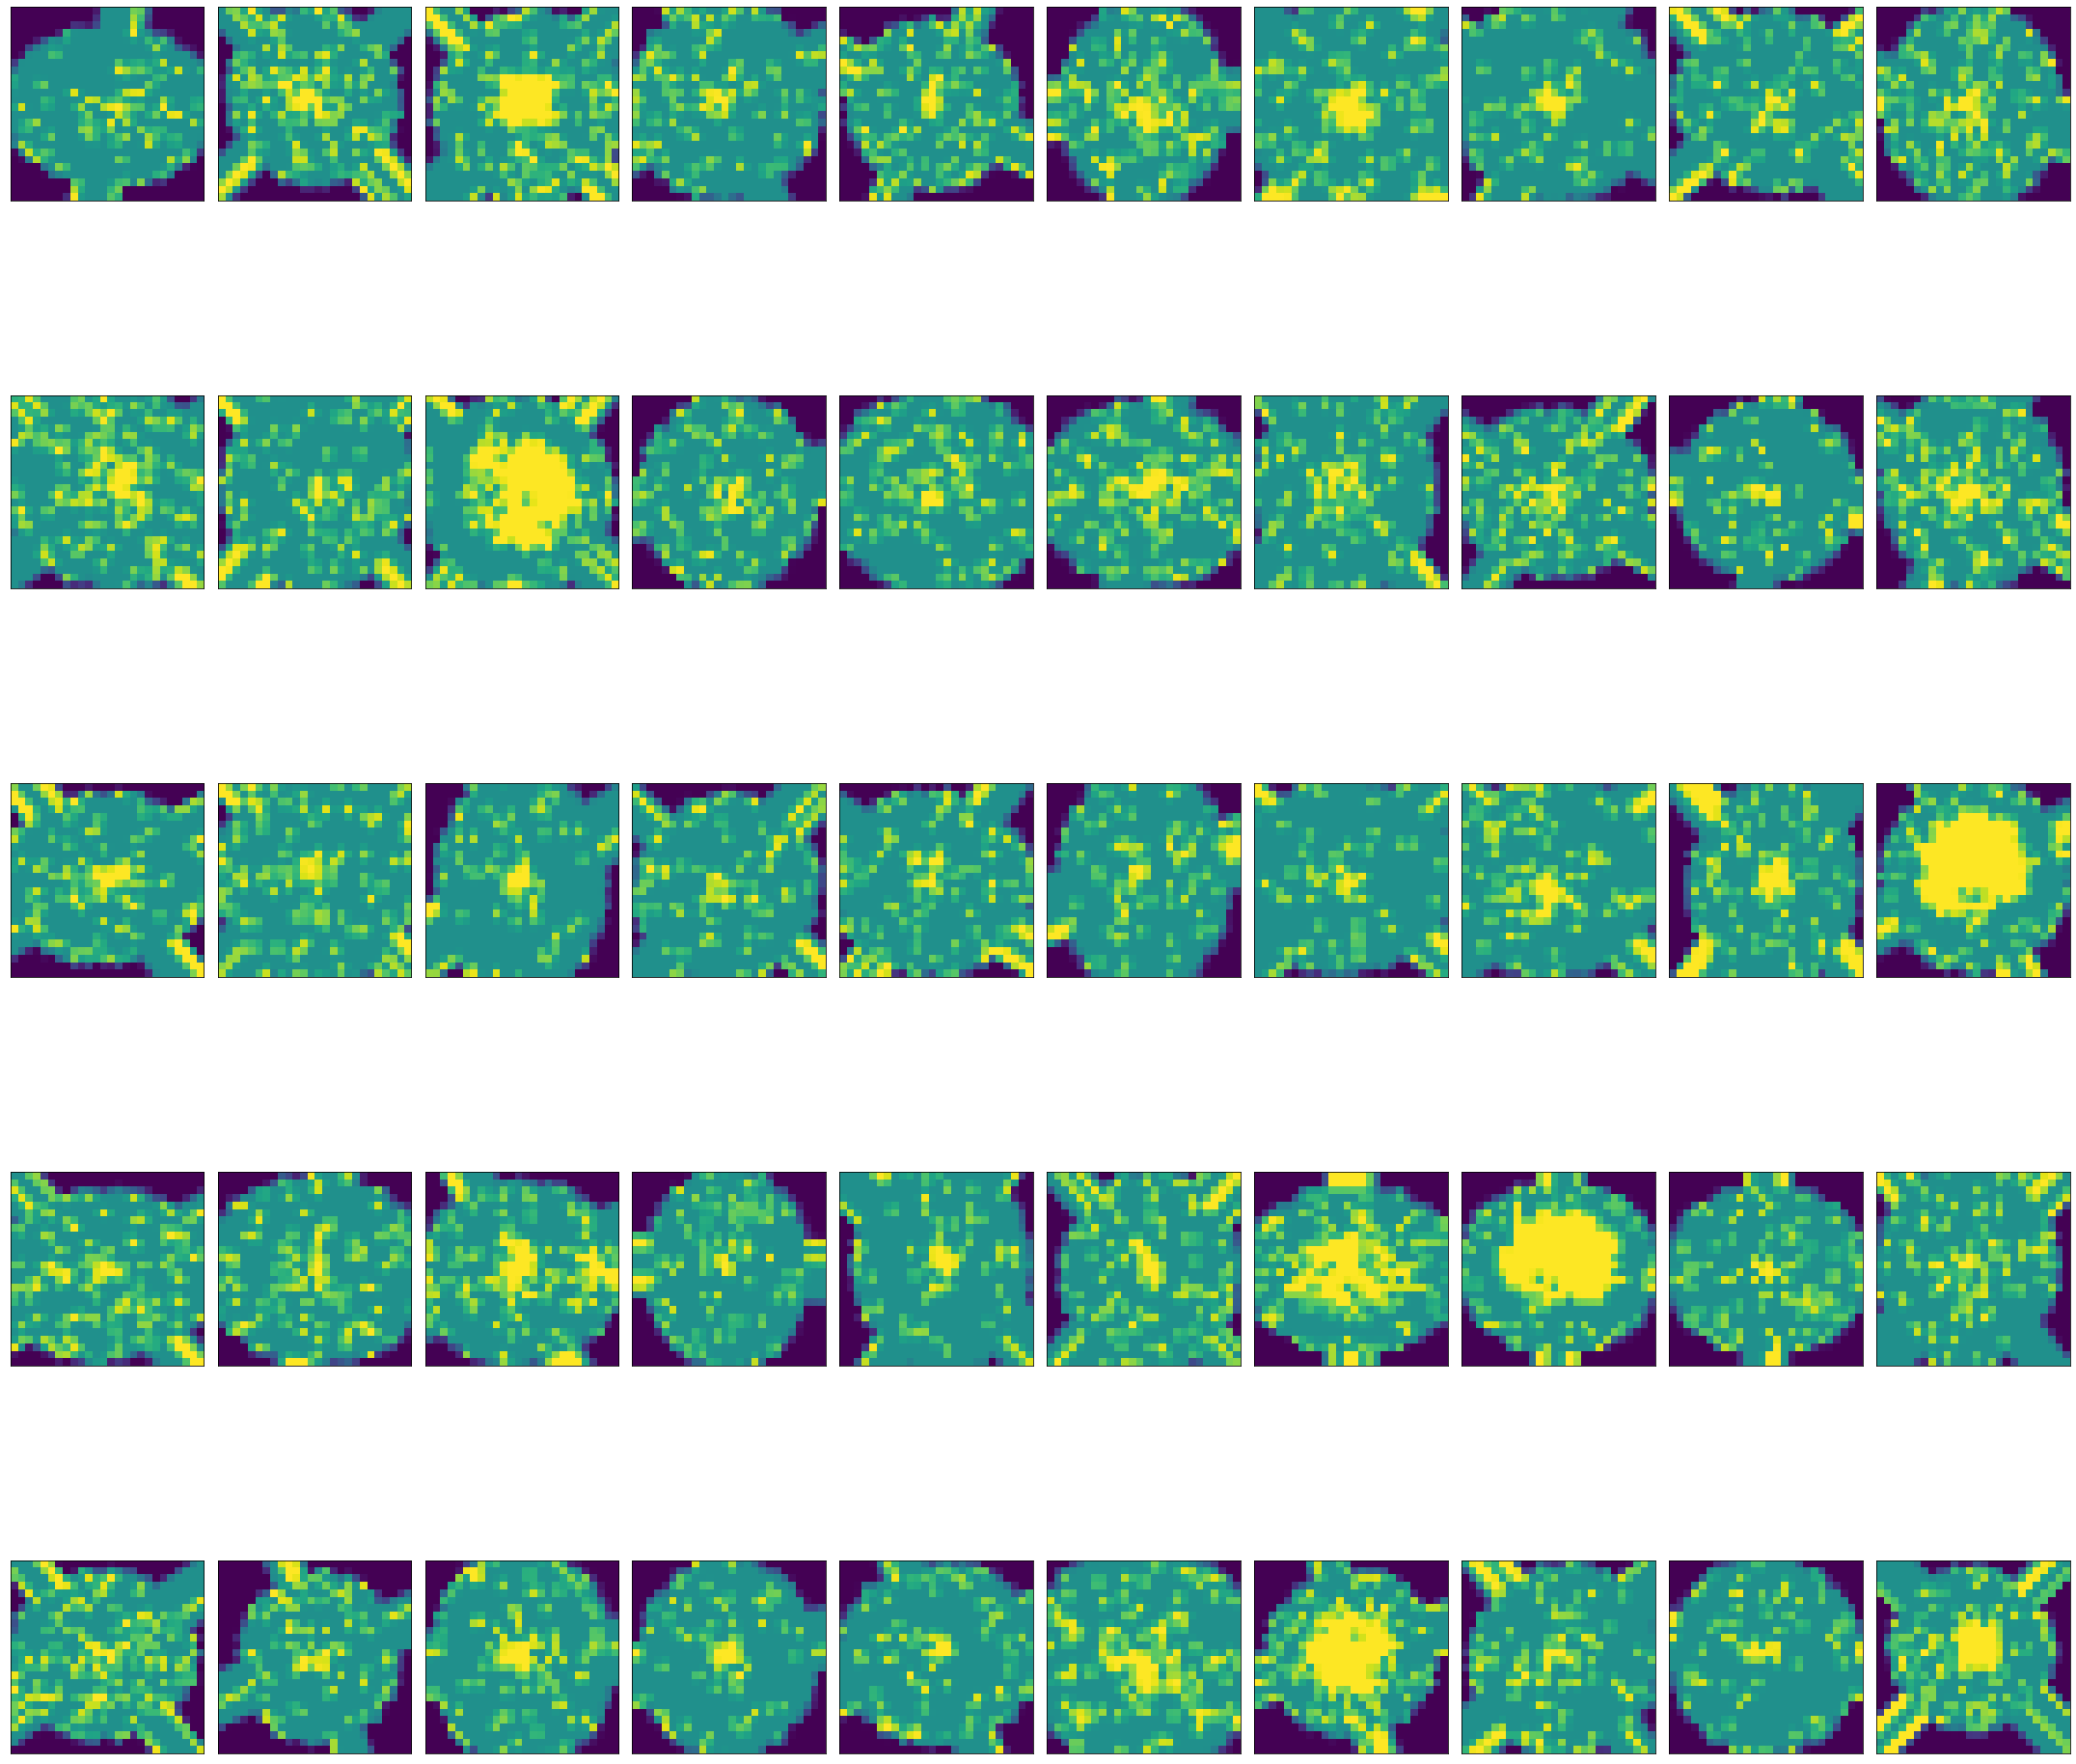

In [ ]:
#이미지 확인2
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(30, 30))
ax = ax.ravel(order='C')
for i in range(50):
    img = x[i].reshape(26,26)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

X_data = x
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
#X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

# one-hot encoding of y_data
y_data = to_categorical(y)

# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)


from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale = 1./255
)

validation_datagen = ImageDataGenerator(
  rescale = 1./255
)

test_datagen = ImageDataGenerator(
  rescale = 1./255
)


train_datagen.fit(X_train)
validation_datagen.fit(X_test)

"""
model = Sequential()
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))
# final layer with 10 neurons to classify the instances
model.add(Dense(9, activation = 'softmax'))
"""

model = Sequential()
# convolution layer
#16@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(16, kernel_size = (3,3), padding ='same', activation='relu', input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3])))
model.add(BatchNormalization())
#MaxPooling 2*2
model.add(BatchNormalization())#16@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(16, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())#32@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(32, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())#MaxPooling 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#32@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(32, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())
#64@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(64, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())
#MaxPooling 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#64@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(64, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())
#128@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(128, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())
#MaxPooling 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#128@3*3 ReLu, BN (ConV계층)
model.add(Conv2D(128, kernel_size = (3,3), padding ='same', activation='relu'))
model.add(BatchNormalization())
#Dropout 0.2
model.add(Dropout(0.2))
#MaxPooling 2*2
#model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten
model.add(Flatten())
#Dense 512
model.add(Dense(512, activation='relu'))
#SoftMax 9
model.add(layers.Dense(9, activation='softmax'))

#최적화 알고리즘
adam = tf.optimizers.Adam(lr = 0.001)
#손실 함수
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 20,
                    verbose = 2,                  
                    validation_data = (X_test, y_test))

Epoch 1/20
630/630 - 330s - loss: 0.5471 - accuracy: 0.7930 - val_loss: 5.7678 - val_accuracy: 0.1177 - 330s/epoch - 525ms/step
Epoch 2/20
630/630 - 330s - loss: 0.2956 - accuracy: 0.8896 - val_loss: 0.3045 - val_accuracy: 0.8866 - 330s/epoch - 523ms/step
Epoch 3/20
630/630 - 324s - loss: 0.2291 - accuracy: 0.9155 - val_loss: 0.3562 - val_accuracy: 0.8756 - 324s/epoch - 514ms/step
Epoch 4/20
630/630 - 327s - loss: 0.1936 - accuracy: 0.9297 - val_loss: 0.9597 - val_accuracy: 0.7480 - 327s/epoch - 519ms/step
Epoch 5/20
630/630 - 325s - loss: 0.1534 - accuracy: 0.9442 - val_loss: 1.9315 - val_accuracy: 0.5720 - 325s/epoch - 516ms/step
Epoch 6/20
630/630 - 326s - loss: 0.1386 - accuracy: 0.9495 - val_loss: 7.6670 - val_accuracy: 0.4276 - 326s/epoch - 517ms/step
Epoch 7/20
630/630 - 324s - loss: 0.1173 - accuracy: 0.9579 - val_loss: 0.6298 - val_accuracy: 0.8477 - 324s/epoch - 515ms/step
Epoch 8/20
630/630 - 323s - loss: 0.1023 - accuracy: 0.9632 - val_loss: 0.5988 - val_accuracy: 0.8486 - 

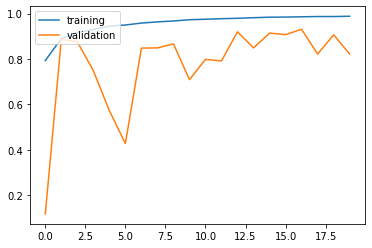

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()


In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

844/844 [==============================] - 33s 39ms/step - loss: 1.1293 - accuracy: 0.8216
Test accuracy:  0.8216296434402466


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2320      
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 16)       64        
 hNormalization)                                                 
                                                        

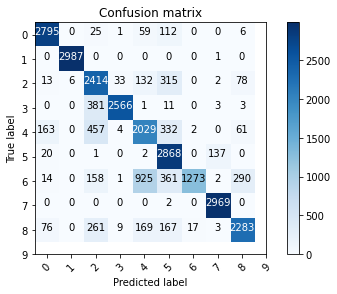

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Look at confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
  thresh = cm.max() / 2.
  for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):    
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.figure(figsize=(20,20))
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))